In [1]:
import os
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from tqdm import tqdm
import matplotlib.pyplot as plt

HOME = "."
SCALE_LIST = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2]
DEFAULT_LENPOLE = 0.5
DEFAULT_MASSCART = 1.0
DEFAULT_MASSPOLE = 0.1

=== Building reward matrix for trial 0 ===


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1761355079257853s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.04996967315673828s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  51 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.034755706787109375s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.04332137107849121s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 216 tasks      | elapsed:    

Saved (12, 900) matrix to: ./data/multitask_transfer_reward_matrix_trial0.npy


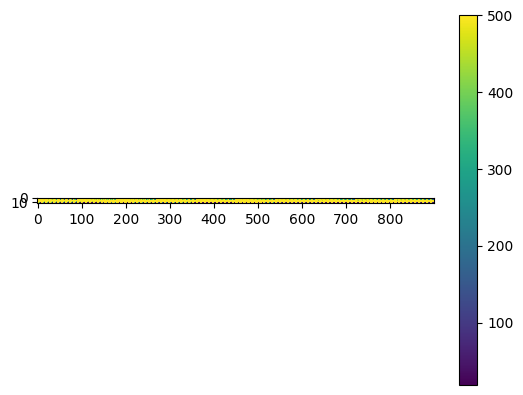

=== Building reward matrix for trial 1 ===


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.01161813735961914s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.06941652297973633s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.04956507682800293s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.02768230438232422s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.10454106330871582s.) Setting batch_size=32.
[Parallel(n_jobs=8)]:

Saved (12, 900) matrix to: ./data/multitask_transfer_reward_matrix_trial1.npy


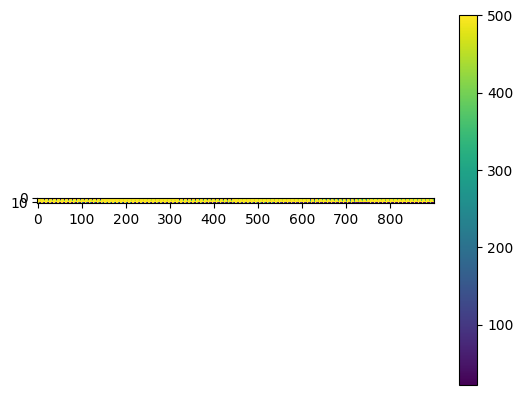

=== Building reward matrix for trial 2 ===


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.017868995666503906s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.051114559173583984s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.06759858131408691s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.07184052467346191s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.07009768486022949s.) Setting batch_size=32.
[Parallel(n_jobs=8)

Saved (12, 900) matrix to: ./data/multitask_transfer_reward_matrix_trial2.npy


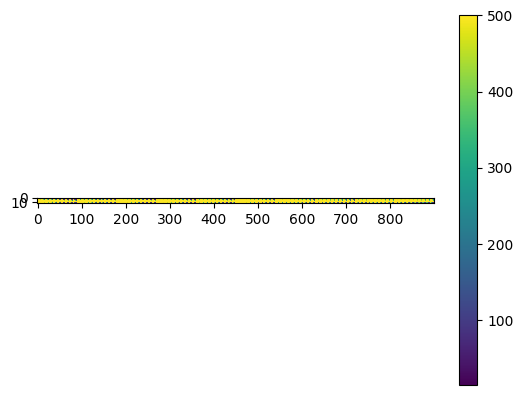

In [2]:
def parse_context_index(idx):
    lenpole_idx   = idx % 9
    masscart_idx  = (idx // 9) % 10
    masspole_idx  = (idx // 90) % 10
    return lenpole_idx, masscart_idx, masspole_idx

def get_numeric_values(lenpole_idx, masscart_idx, masspole_idx):
    ln_val = round(DEFAULT_LENPOLE  * SCALE_LIST[lenpole_idx+1], 2)
    mc_val = round(DEFAULT_MASSCART * SCALE_LIST[masscart_idx], 2)
    mp_val = round(DEFAULT_MASSPOLE * SCALE_LIST[masspole_idx], 2)
    return ln_val, mc_val, mp_val

def get_reward(i, j, trial):
    # i, j are source/target context indices in [0..999]
    i_lenpole_idx, i_masscart_idx, i_masspole_idx = parse_context_index(i)
    ln_i, mc_i, mp_i = get_numeric_values(i_lenpole_idx, i_masscart_idx, i_masspole_idx)

    source_dir = (
        f"{HOME}/results/cartpole_multi-task/"
        f"masscartmulti-lenpolemulti-masspolemulti-force10.00-update0.02-PPO-trial{trial}/"
        f"steps{i}"
    )

    j_lenpole_idx, j_masscart_idx, j_masspole_idx = parse_context_index(j)
    ln_j, mc_j, mp_j = get_numeric_values(j_lenpole_idx, j_masscart_idx, j_masspole_idx)

    target_dir = (
        f"{source_dir}/transfer_masscart{mc_j}-lenpole{ln_j}-masspole{mp_j}-"
        f"force10.00-update0.02-PPO-trial{trial}"
    )
    reward_file = os.path.join(target_dir, "test_reward.csv")

    if os.path.exists(reward_file):
        df = pd.read_csv(reward_file, header=None)
        return df[0].mean()
    else:
        return np.nan
        
LENGTH = 900
step_list = [5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000, 55000000, 60000000]
for trial in range(3):
    print(f"=== Building reward matrix for trial {trial} ===")

    # Create a list of all (i, j) pairs
    tasks = [(i, j) for i in step_list for j in range(LENGTH)]
    
    # Using Parallel: set n_jobs to the number of cores you want to use
    results = Parallel(n_jobs=8, verbose=10)(
        delayed(get_reward)(i, j, trial) for (i, j) in tasks
    )
    
    # 'results' is a flat list of length 1,000*1,000 = 1e6
    # reshape into (1000, 1000)
    reward_matrix = np.reshape(results, (len(step_list), LENGTH))
    out_path = os.path.join(HOME, f"data/multitask_transfer_reward_matrix_trial{trial}.npy")
    np.save(out_path, reward_matrix)
    print(f"Saved {reward_matrix.shape} matrix to: {out_path}")

    plt.clf()
    plt.imshow(reward_matrix, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.show()


In [3]:
matrix_list = []
for trial in range(3):
    matrix = np.load(f"./data/multitask_transfer_reward_matrix_trial{trial}.npy")
    matrix_list.append(np.mean(matrix, axis=1))
whole_matrix = np.concatenate([matrix_list[i][:, np.newaxis] for i in range(3)], axis=1)
print(whole_matrix)
print(np.mean(whole_matrix, axis=1))
print(np.std(whole_matrix, axis=1))


[[278.4793     400.6387     368.3907    ]
 [303.27514444 459.11477778 500.        ]
 [419.52235556 494.4439     500.        ]
 [473.17524444 487.01011111 438.03045556]
 [329.07101111 488.17562222 499.23224444]
 [444.14427778 448.74642222 414.86571111]
 [440.88923333 499.99434444 499.8021    ]
 [498.89918889 479.82       485.0074    ]
 [446.94942222 441.23418889 360.28247778]
 [497.57981111 497.77967778 499.86353333]
 [359.54414444 495.57316667 371.81988889]
 [312.5657     218.38966667 370.28101111]]
[349.16956667 420.79664074 471.32208519 466.07193704 438.82629259
 435.9188037  480.22855926 487.90886296 416.15536296 498.40767407
 408.97906667 300.41212593]
[51.69022298 84.75996271 36.69810671 20.61705438 77.73985929 15.00487619
 27.81721485  8.05471819 39.57693307  1.03267656 61.43602142 62.60206147]


In [4]:
np.save("data/multitask_", whole_matrix)